# Subjective Evaluation Analysis

Processes and visualizes survey responses from a subjective evaluation study, where participants rated the models' performance after watching a [demonstration video](https://www.youtube.com/watch?v=28W14f0ROkA).

## Tasks
1. Load survey response data from an Excel file.
2. Analyze agreement and intensity scales using Likert-style plots.
3. Identify musical aspects contributing to each evaluation dimension.
4. Compare perceived control under uniform vs. per-dimension blending conditions.

## Dependencies
- Python 3.10+
- pandas
- matplotlib

## Usage
- Run all cells sequentially.
- Ensure the Excel response file is available in the working directory (`Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx`).
- Modify file paths or plotting functions as needed to adapt to new survey data.


## Task 1: Load survey response data from an Excel file.

In [1]:
import pandas as pd

file_path = "Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx"

# Show the full first few rows (including the actual header row)
df_raw = pd.read_excel(file_path, header=None)  # Don't treat first row as header
pd.set_option("display.max_columns", None)  # Show all columns
print(df_raw.head(10))  # Equivalent to !head for XLSX


                           0   \
0                   Timestamp   
1  2025-07-24 16:55:44.728000   
2  2025-07-24 16:56:44.761000   
3  2025-07-24 17:20:56.680000   
4  2025-07-24 17:30:20.704000   
5  2025-07-24 17:32:56.790000   
6  2025-07-24 17:37:28.042000   
7  2025-07-24 17:42:21.349000   
8  2025-07-24 17:48:59.410000   
9  2025-07-24 17:51:42.131000   

                                                  1   \
0  Does the midpoint of the morph (50% blend) sou...   
1                                              Agree   
2                                     Strongly Agree   
3                                              Agree   
4                                              Agree   
5                                     Strongly Agree   
6                                              Agree   
7                                              Agree   
8                                              Agree   
9                                     Strongly Agree   

                   

## Task 2: Analyze agreement and intensity scales using Likert-style plots.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel, skip row 0 (question text), and use default column indexes
file_path = "Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx"
df = pd.read_excel(file_path, skiprows=1, header=None)

# Extract just the response columns
agreement_data = df.iloc[:, [1, 2, 3]].copy()  
intensity_data = df.iloc[:, [4, 5, 13,14]].copy()  

# Rename columns for clarity
agreement_data.columns = ["Q1", "Q2", "Q3"]
intensity_data.columns = ["Q4", "Q5", "Q8", "Q9"]

# Define label-to-value mappings
agreement_map = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral / Unsure": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

intensity_map = {
    "Not at all": 1,
    "Slightly": 2,
    "Moderately": 3,
    "Strongly": 4,
    "Very strongly": 5
}

# Map text labels to numeric values
agreement_data = agreement_data.applymap(agreement_map.get)
intensity_data = intensity_data.applymap(intensity_map.get)

def calculate_percentages(df):
    """
    Calculate percentage distribution of responses per question.
    Returns a DataFrame where rows are questions and columns are response categories.
    """
    percentages = pd.DataFrame()
    for col in df.columns:
        counts = df[col].value_counts(normalize=True).reindex([1, 2, 3, 4, 5], fill_value=0)
        percentages[col] = counts * 100  # convert to percentage
    return percentages.T

def calculate_tendencies(df):
    """
    Calculate median and mode for each question.
    Returns a DataFrame with median and mode per question.
    """
    medians = df.median(axis=0)
    modes = df.mode(axis=0).iloc[0]  # mode() returns DataFrame; take first mode if multiple
    tendencies = pd.DataFrame({'Median': medians, 'Mode': modes})
    return tendencies

# Calculate and print percentages
print("Agreement Scale Response Percentages:")
agreement_percentages = calculate_percentages(agreement_data)
print(agreement_percentages)

print("\nIntensity Scale Response Percentages:")
intensity_percentages = calculate_percentages(intensity_data)
print(intensity_percentages)

# Calculate and print tendencies
print("\nAgreement Scale Tendencies (Median and Mode):")
agreement_tendencies = calculate_tendencies(agreement_data)
print(agreement_tendencies)

print("\nIntensity Scale Tendencies (Median and Mode):")
intensity_tendencies = calculate_tendencies(intensity_data)
print(intensity_tendencies)

# Plotting function (unchanged)
def plot_likert(df, labels, title):
    likert_counts = pd.DataFrame()
    for col in df.columns:
        counts = df[col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
        likert_counts[col] = counts
    likert_counts = likert_counts.T
    likert_counts.columns = [labels[i] for i in likert_counts.columns]
    # print(likert_counts.columns)
    
    ax = likert_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white')

    plt.title(title)
    plt.xlabel("Question")
    plt.ylabel("Number of Responses")
    plt.xticks(rotation=0)
    plt.legend(title="Response")
    plt.tight_layout()
    plt.show()


# Define label sets for plotting
agreement_labels = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Neutral / Unsure",
    4: "Agree",
    5: "Strongly Agree"
}

intensity_labels = {
    1: "Not at all",
    2: "Slightly",
    3: "Moderately",
    4: "Strongly",
    5: "Very strongly"
}

# Generate plots
# plot_likert(agreement_data, agreement_labels, "Agreement Scale Responses (Q1–Q3)")
# plot_likert(intensity_data, intensity_labels, "Intensity Scale Responses (Q4, Q5, Q13, Q14)")


Agreement Scale Response Percentages:
Q1    1    2         3          4          5
Q1  0.0  0.0  5.813953  59.302326  34.883721
Q2  0.0  0.0  6.976744  47.674419  45.348837
Q3  0.0  0.0  0.000000  62.790698  37.209302

Intensity Scale Response Percentages:
Q4          1          2    3          4          5
Q4   0.000000   0.000000  0.0  63.953488  36.046512
Q5   0.000000   0.000000  0.0  68.604651  31.395349
Q8  52.325581  47.674419  0.0   0.000000   0.000000
Q9   0.000000   0.000000  0.0  58.139535  41.860465

Agreement Scale Tendencies (Median and Mode):
    Median  Mode
Q1     4.0     4
Q2     4.0     4
Q3     4.0     4

Intensity Scale Tendencies (Median and Mode):
    Median  Mode
Q4     4.0     4
Q5     4.0     4
Q8     1.0     1
Q9     4.0     4


/var/folders/yl/_t4420wx65987pq_rkpkbwjw0000gp/T/ipykernel_2341/3813187950.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  agreement_data = agreement_data.applymap(agreement_map.get)
/var/folders/yl/_t4420wx65987pq_rkpkbwjw0000gp/T/ipykernel_2341/3813187950.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  intensity_data = intensity_data.applymap(intensity_map.get)


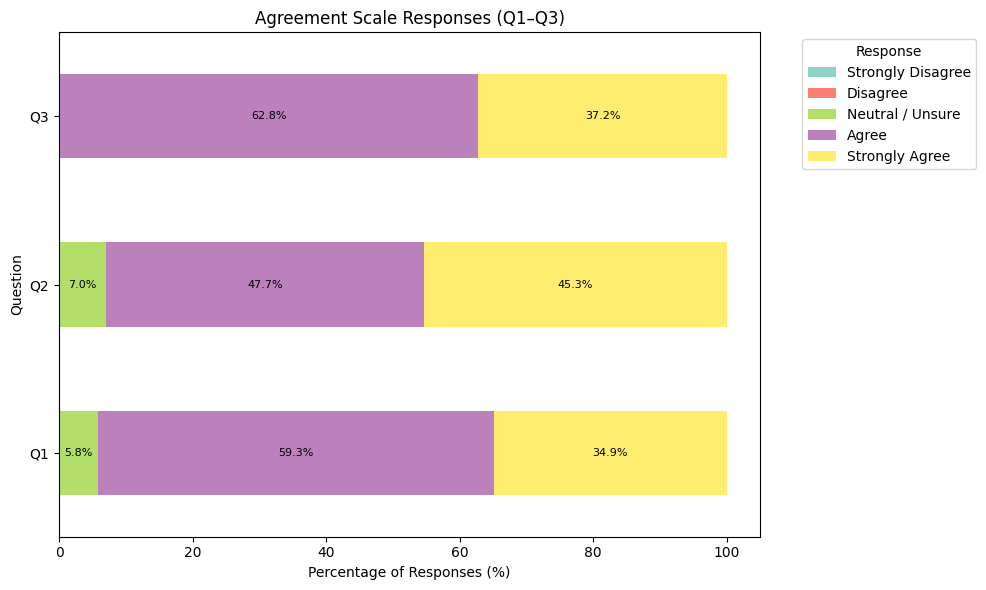

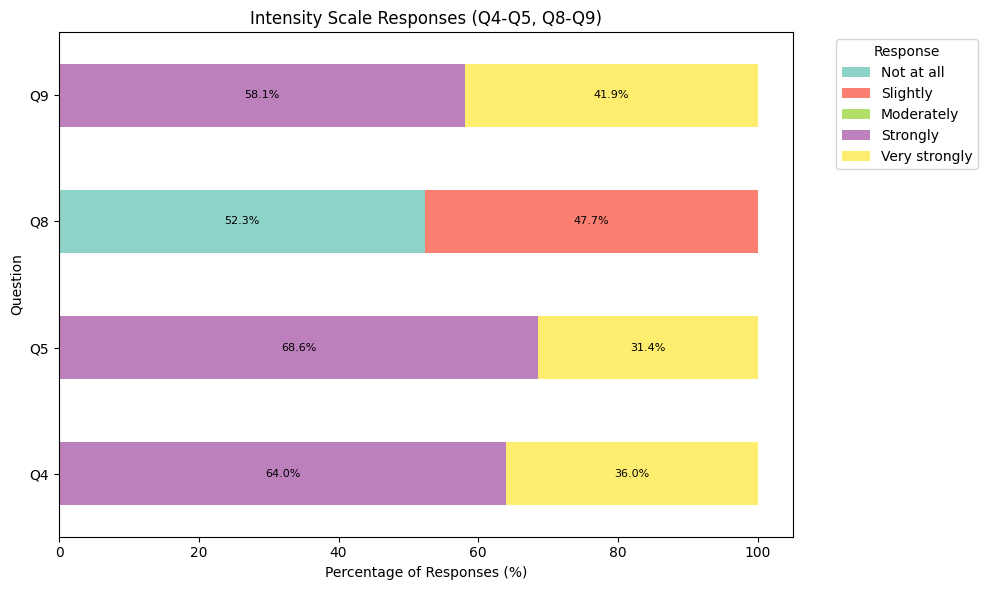

In [5]:
def plot_likert_percent_horizontal(df, labels, title):
    # Calculate percentage distribution
    likert_counts = pd.DataFrame()
    for col in df.columns:
        counts = df[col].value_counts(normalize=True).reindex([1, 2, 3, 4, 5], fill_value=0)
        likert_counts[col] = counts * 100  # Convert to percentages

    likert_counts = likert_counts.T
    likert_counts.columns = [labels[i] for i in likert_counts.columns]

    # Plot as horizontal stacked bar chart
    ax = likert_counts.plot(kind="barh", stacked=True, figsize=(10, 6), colormap="Set3")

    # Add text labels in each segment
    for container in ax.containers:
        for rect in container:
            width = rect.get_width()
            if width > 3:  # only label if big enough
                ax.text(
                    rect.get_x() + width / 2,
                    rect.get_y() + rect.get_height() / 2,
                    f'{width:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='black'
                )

    plt.title(title)
    plt.xlabel("Percentage of Responses (%)")
    plt.ylabel("Question")
    plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_likert_percent_horizontal(agreement_data, agreement_labels, "Agreement Scale Responses (Q1–Q3)")
plot_likert_percent_horizontal(intensity_data, intensity_labels, "Intensity Scale Responses (Q4-Q5, Q8-Q9)")



## Task 3: Identify musical aspects contributing to each dimension.

In [6]:
import pandas as pd

df = pd.read_excel("Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx", header=[0, 1])  # read with two header rows just in case
print(df.columns)


MultiIndex([(                                                                                                                                                                                    'Timestamp', ...),
            (                                                                           'Does the midpoint of the morph (50% blend) sound like a perceptually balanced combination of both original loops? ', ...),
            (                                        'Do the interpolated transitions feel musically coherent — e.g., do changes in rhythm, timbre, and structure make musical sense and feel intentional? ', ...),
            ( 'Does the interpolation between the two loops sound musically usable — for example, could it be used as a seamless transition,  genre blend, or timbre transformation within a musical piece?', ...),
            (                                                           'Can you clearly perceive a gradual transformation in sound as the morph progres

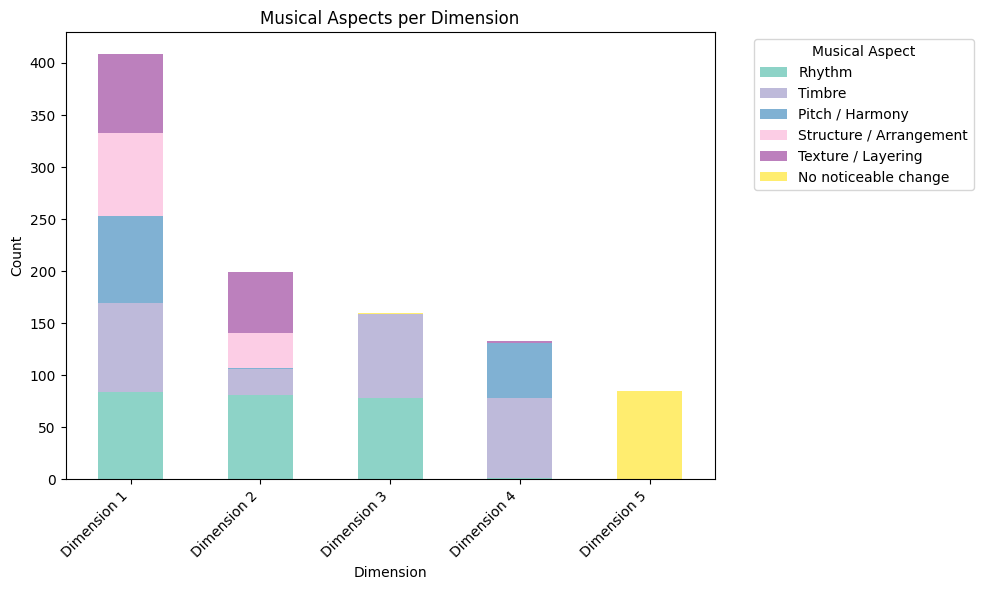

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read Excel with multi-level headers
df = pd.read_excel("Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx", header=[0, 1])

# 2. Flatten the MultiIndex into single strings
df.columns = [' '.join(map(str, col)).strip() for col in df.columns]

# 3. Filter only columns with the musical aspect question pattern
aspect_cols = [col for col in df.columns if "Can you identify which musical aspects" in col]

# 4. Create a new DataFrame with only these columns
musical_aspects = df[aspect_cols].copy()

# 5. Extract text inside [ ] and keep only the part before any dash ( -, –, — )
short = musical_aspects.columns.str.extract(r'\[(.*?)\]')[0]
short = short.str.split(r'\s*[–—-]\s*', n=1).str[0].str.strip()   # split on any dash variant
musical_aspects.columns = short


# 6. Count dimensions per aspect
aspect_dimension_counts = {}

for col in musical_aspects.columns:
    counts = (
        musical_aspects[col]
        .dropna()
        .astype(str)         # make sure they're strings
        .str.split(",")      # split multiple selections
        .explode()           # flatten into rows
        .str.strip()         # remove extra spaces
        .value_counts()      # count occurrences
    )
    aspect_dimension_counts[col] = counts

# 7. Combine into DataFrame
counts_df = pd.DataFrame(aspect_dimension_counts).fillna(0).astype(int)

# 8. Plot stacked bar chart with dimensions on x-axis
counts_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set3"
)

plt.title("Musical Aspects per Dimension")
plt.ylabel("Count")
plt.xlabel("Dimension")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Musical Aspect", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



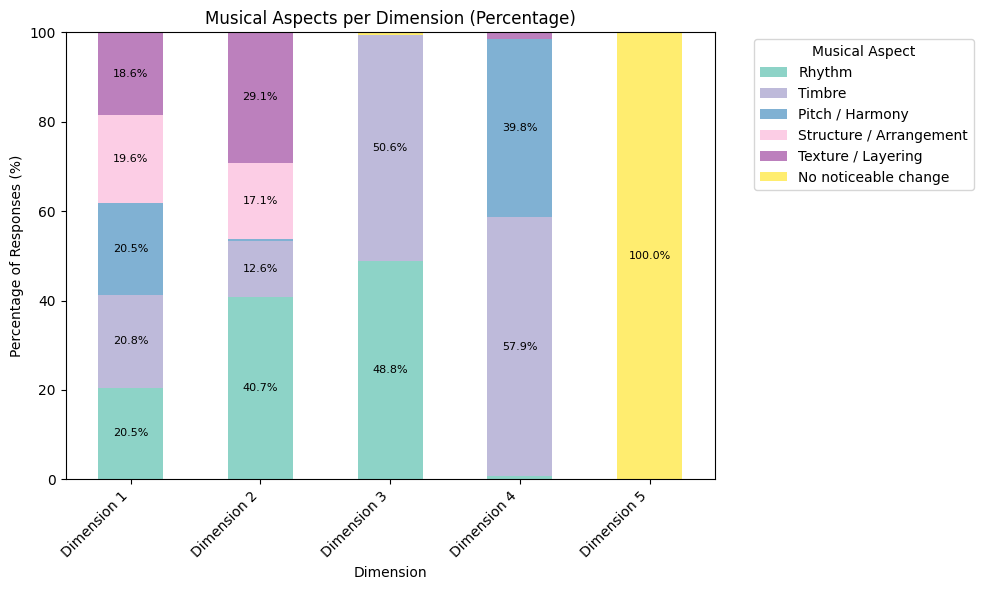

In [21]:
# 8. Convert counts to percentages
percent_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# 9. Plot stacked bar chart with percentages
ax = percent_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set3"
)

plt.title("Musical Aspects per Dimension (Percentage)")
plt.ylabel("Percentage of Responses (%)")
plt.xlabel("Dimension")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.legend(title="Musical Aspect", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Add percentage labels (rounded, no decimals)
for c in ax.containers:
    # Only label segments > 5% to avoid clutter
    labels = [f"{v.get_height():.1f}%" if v.get_height() > 5 else "" for v in c]
    ax.bar_label(c, labels=labels, label_type="center", fontsize=8)


plt.show()


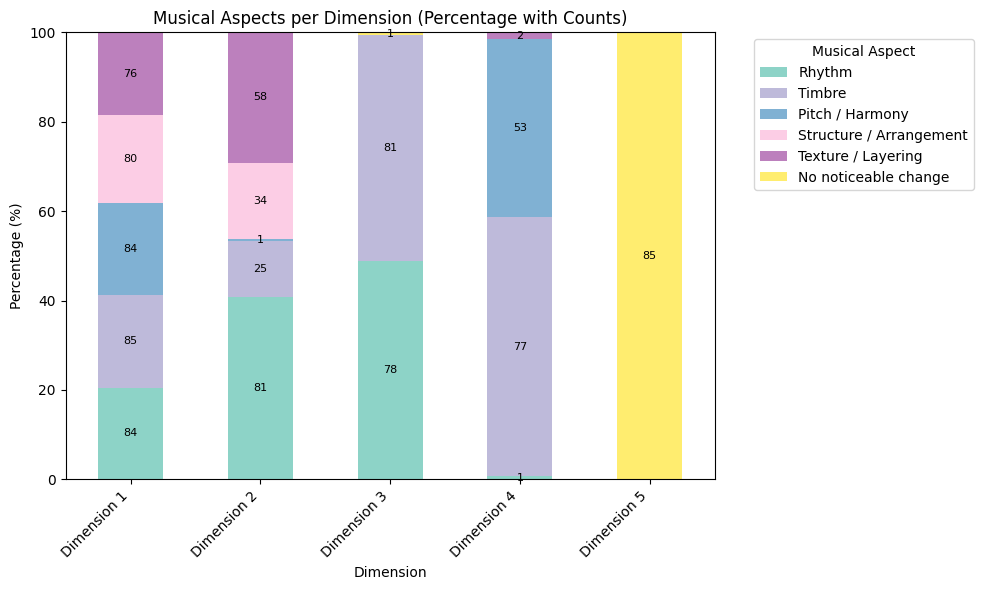

In [86]:
# 8. Convert counts to percentages
percent_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# 9. Plot stacked bar chart with percentages
ax = percent_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set3"
)

# 10. Add count labels inside bars
for i, dim in enumerate(counts_df.index):
    for j, aspect in enumerate(counts_df.columns):
        val = counts_df.loc[dim, aspect]
        if val > 0:
            bottom = percent_df.loc[dim, :aspect].sum() - percent_df.loc[dim, aspect]
            ax.text(
                i,
                bottom + percent_df.loc[dim, aspect]/2,
                str(val),
                ha="center",
                va="center",
                fontsize=8,
                color="black"
            )

plt.title("Musical Aspects per Dimension (Percentage with Counts)")
plt.ylabel("Percentage (%)")
plt.xlabel("Dimension")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.legend(title="Musical Aspect", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [97]:
import pandas as pd

# 1. Calculate percentages per dimension
percent_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# 2. Transpose counts and percentages
counts_t = counts_df.T
percent_t = percent_df.T

# 3. Create a combined table with counts and percentages
combined_table_t = pd.DataFrame()

for col in counts_t.columns:
    combined_table_t[col + " (count)"] = counts_t[col]
    combined_table_t[col + " (%)"] = percent_t[col].round(1)

# 4. Display the table
combined_table_t


,Dimension 1 (count),Dimension 1 (%),Dimension 2 (count),Dimension 2 (%),Dimension 3 (count),Dimension 3 (%),Dimension 4 (count),Dimension 4 (%),Dimension 5 (count),Dimension 5 (%)
Rhythm,84,20.5,81,40.7,78,48.8,1,0.8,0,0.0
Timbre,85,20.8,25,12.6,81,50.6,77,57.9,0,0.0
Pitch / Harmony,84,20.5,1,0.5,0,0.0,53,39.8,0,0.0
Structure / Arrangement,80,19.6,34,17.1,0,0.0,0,0.0,0,0.0
Texture / Layering,76,18.6,58,29.1,0,0.0,2,1.5,0,0.0
No noticeable change,0,0.0,0,0.0,1,0.6,0,0.0,85,100.0


In [98]:
import pandas as pd

# counts_df: index = dimensions, columns = musical aspects

# 1. Calculate percentages per dimension
percent_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# 2. For each dimension, find the most voted musical aspect
most_voted = counts_df.idxmax(axis=1)

# 3. Combine counts, percentages, and most voted aspect into one table
summary_table = pd.DataFrame()

for col in counts_df.columns:
    summary_table[col + " (count)"] = counts_df[col]
    summary_table[col + " (%)"] = percent_df[col].round(1)

summary_table["Most voted aspect"] = most_voted

# 4. Display
summary_table


,Rhythm (count),Rhythm (%),Timbre (count),Timbre (%),Pitch / Harmony (count),Pitch / Harmony (%),Structure / Arrangement (count),Structure / Arrangement (%),Texture / Layering (count),Texture / Layering (%),No noticeable change (count),No noticeable change (%),Most voted aspect
Dimension 1,84,20.5,85,20.8,84,20.5,80,19.6,76,18.6,0,0.0,Timbre
Dimension 2,81,40.7,25,12.6,1,0.5,34,17.1,58,29.1,0,0.0,Rhythm
Dimension 3,78,48.8,81,50.6,0,0.0,0,0.0,0,0.0,1,0.6,Timbre
Dimension 4,1,0.8,77,57.9,53,39.8,0,0.0,2,1.5,0,0.0,Timbre
Dimension 5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,85,100.0,No noticeable change


## Task 4: Compare perceived control under uniform vs. per-dimension blending conditions.

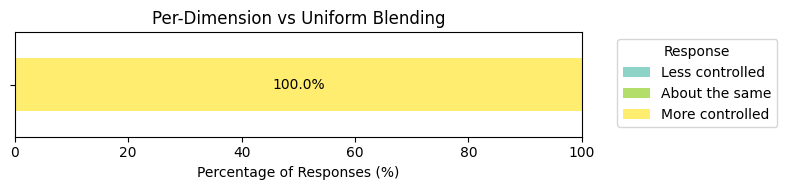

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read Excel with multi-level headers
df = pd.read_excel("Subjective Evaluation_ FreeSound Loop Generator updated (Responses).xlsx", header=[0, 1])

# 2. Flatten the MultiIndex into single strings
df.columns = [' '.join(map(str, col)).strip() for col in df.columns]

# 3. Find the column for the A/B question
ab_col = [col for col in df.columns if "Compared to uniform blending" in col][0]

# 4. Extract the responses
ab_data = df[ab_col].dropna()

# 5. Order of categories
categories = ["Less controlled", "About the same", "More controlled"]

# 6. Calculate counts and percentages
counts = ab_data.value_counts().reindex(categories, fill_value=0)
percentages = (counts / counts.sum() * 100).to_frame().T

# 7. Plot as 100% stacked horizontal bar
ax = percentages.plot(
    kind="barh",
    stacked=True,
    figsize=(8, 2),
    colormap="Set3"
)

# 8. Add percentage labels in the middle of each segment
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax.annotate(f"{width:.1f}%",
                        (bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2),
                        ha="center", va="center", fontsize=10)

# 9. Formatting
ax.set_yticklabels([""])  # Force blank label
plt.title("Per-Dimension vs Uniform Blending")
plt.xlabel("Percentage of Responses (%)")
plt.xlim(0, 100)
plt.xticks(range(0, 101, 20))
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()